In [42]:
#!pip install graphviz
import graphviz

  Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

In [23]:
#Make a pretty confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
    

In [16]:
df = pd.read_csv("CropEffandEmLabels.csv", index_col = 0)
data = df.copy()
data

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,Argentina,1961,0.9416,4.848952e+07,0.1747,5.149694e+04,Low,Mid,High
1,Argentina,1962,0.9544,4.860748e+07,0.1792,5.092989e+04,Low,Mid,High
2,Argentina,1963,0.9589,5.533947e+07,0.3471,5.771141e+04,Mid,Mid,High
3,Argentina,1964,0.9624,5.761074e+07,0.4164,5.986154e+04,Mid,Mid,High
4,Argentina,1965,0.9685,5.432264e+07,0.5205,5.608946e+04,Mid,Mid,High
...,...,...,...,...,...,...,...,...,...
862,South America,2017,0.3189,1.696150e+09,153.3090,5.318752e+06,High,High,Mid
863,South America,2018,0.3179,1.655944e+09,154.0408,5.209010e+06,High,High,Mid
864,South America,2019,0.3174,1.719963e+09,163.5284,5.418913e+06,High,High,Mid
865,South America,2020,0.3189,1.752409e+09,189.3039,5.495168e+06,High,High,Mid


quantitative_columns = ['Cropland (ha/cap)', 'Crop Prod Total (tonnes)','Fertilizer N20 Emissions (kt)']  # replace with actual quantitative column names
categorical_columns = ['Em_label', 'CL_label', 'Year', 'Area']  # replace with your actual categorical column names

# Define target column (e.g., Production Efficiency label - high, mid, low)
target_column = 'Eff_label'  # your target label

# Encode categorical features
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoder for each column if you need to reverse-transform

# Encode the target variable
target_encoder = LabelEncoder()
data[target_column] = target_encoder.fit_transform(data[target_column])

In [79]:
quantitative_columns = ['Cropland (ha/cap)', 'Crop Prod Total (tonnes)']  # replace with actual quantitative column names
categorical_columns = ['Year', 'Area']  # replace with your actual categorical column names

# Define target column (e.g., Production Efficiency label - high, mid, low)
target_column = 'Em_label'  # your target label

# Encode categorical features
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Store encoder for each column if you need to reverse-transform

# Encode the target variable
target_encoder = LabelEncoder()
data[target_column] = target_encoder.fit_transform(data[target_column])

In [80]:
data

,Area,Year,Cropland (ha/cap),Crop Prod Total (tonnes),Fertilizer N20 Emissions (kt),Efficiency (kt/cropland),Em_label,Eff_label,CL_label
0,0,0,0.9416,4.848952e+07,0.1747,5.149694e+04,1,2,0
1,0,1,0.9544,4.860748e+07,0.1792,5.092989e+04,1,2,0
2,0,2,0.9589,5.533947e+07,0.3471,5.771141e+04,2,2,0
3,0,3,0.9624,5.761074e+07,0.4164,5.986154e+04,2,2,0
4,0,4,0.9685,5.432264e+07,0.5205,5.608946e+04,2,2,0
...,...,...,...,...,...,...,...,...,...
862,10,56,0.3189,1.696150e+09,153.3090,5.318752e+06,0,0,2
863,10,57,0.3179,1.655944e+09,154.0408,5.209010e+06,0,0,2
864,10,58,0.3174,1.719963e+09,163.5284,5.418913e+06,0,0,2
865,10,59,0.3189,1.752409e+09,189.3039,5.495168e+06,0,0,2


In [81]:
X = data[quantitative_columns + categorical_columns]
y = data[[target_column]]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9151515151515152
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.87      0.89      0.88        46
           2       0.92      0.92      0.92        88

    accuracy                           0.92       165
   macro avg       0.92      0.92      0.92       165
weighted avg       0.92      0.92      0.92       165

Confusion Matrix:
 [[29  0  2]
 [ 0 41  5]
 [ 1  6 81]]


In [82]:
X_train.head()

,Cropland (ha/cap),Crop Prod Total (tonnes),Year,Area
242,0.1103,22558436.95,56,3
751,0.3278,9922831.50,7,13
803,0.1158,17505937.25,59,13
471,0.5708,4116712.07,37,7
303,0.0792,81708042.07,55,4


In [83]:
X_test.head()

,Cropland (ha/cap),Crop Prod Total (tonnes),Year,Area
652,0.1610,4.845463e+05,32,11
176,0.3096,1.194172e+09,52,2
68,0.3697,3.449178e+06,6,1
170,0.3190,8.962388e+08,46,2
279,0.1444,5.753186e+07,31,4


In [84]:
y_train.head()

,Em_label
242,2
751,2
803,2
471,2
303,0


In [85]:
y_test.head()

,Em_label
652,1
176,0
68,1
170,0
279,0


In [21]:
#class_names = target_encoder.inverse_transform(dt_model.classes_).astype(str)
class_names = ["High", "Low", "Mid"] #[0,1,2]
class_names



['High', 'Low', 'Mid']

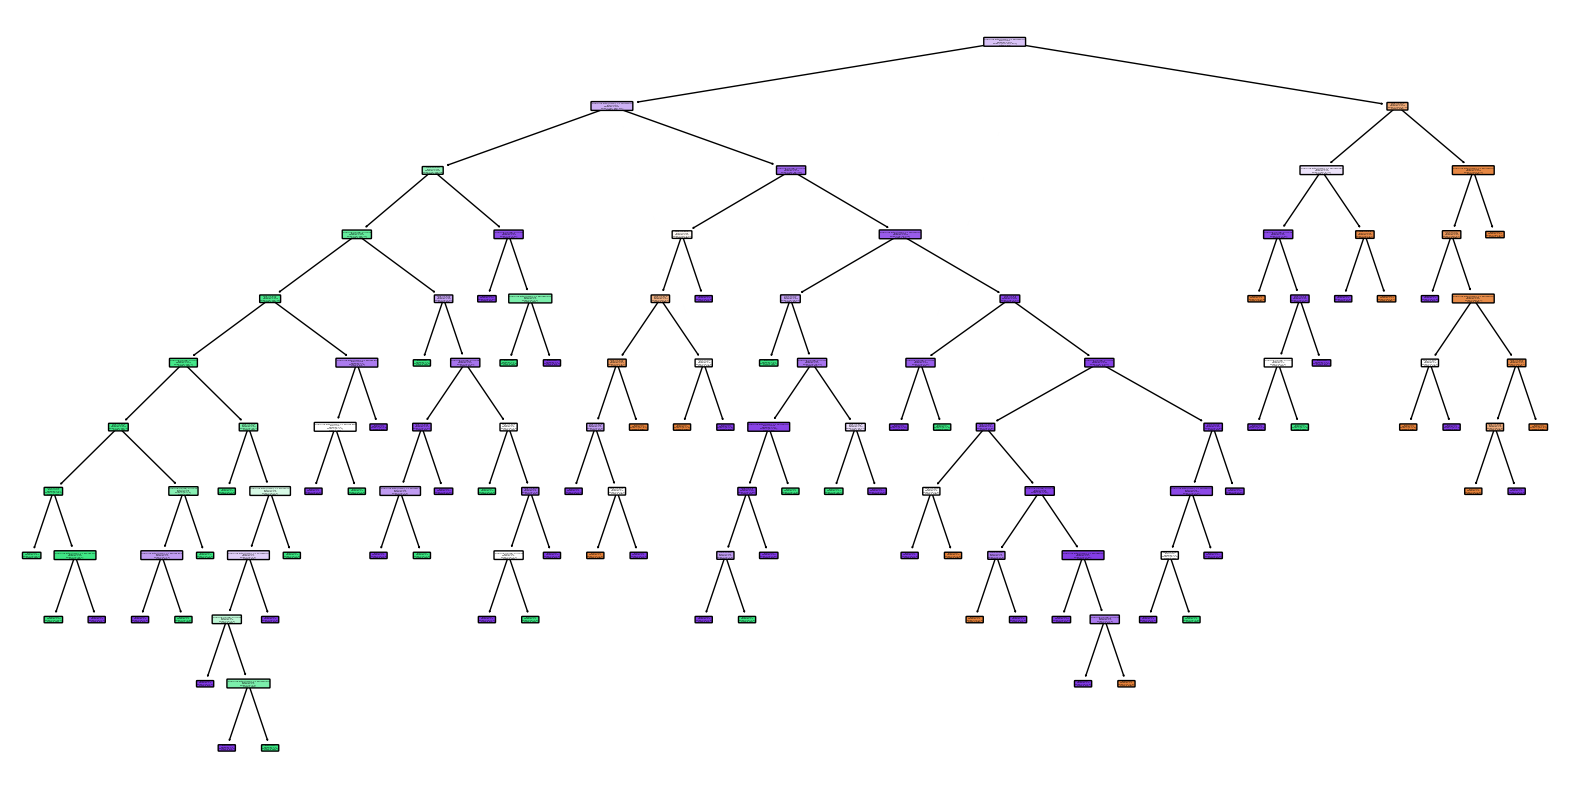

In [86]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


The confusion matrix is:
[[29  0  2]
 [ 0 41  5]
 [ 1  6 81]]


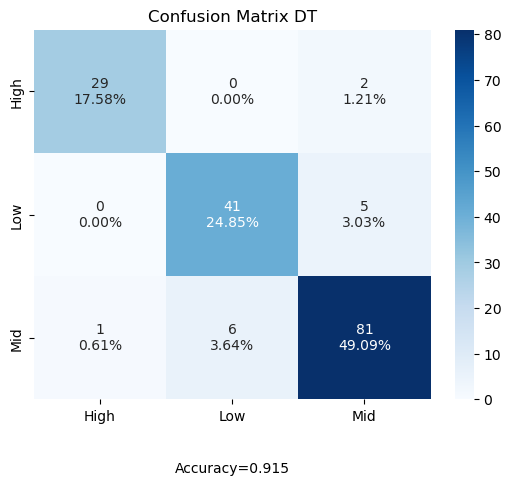

In [87]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low', 'Mid']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT",
                     xyplotlabels=False)

Accuracy: 0.8545454545454545
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       0.77      0.80      0.79        46
           2       0.89      0.83      0.86        88

    accuracy                           0.85       165
   macro avg       0.85      0.88      0.86       165
weighted avg       0.86      0.85      0.85       165

Confusion Matrix:
 [[31  0  0]
 [ 0 37  9]
 [ 4 11 73]]


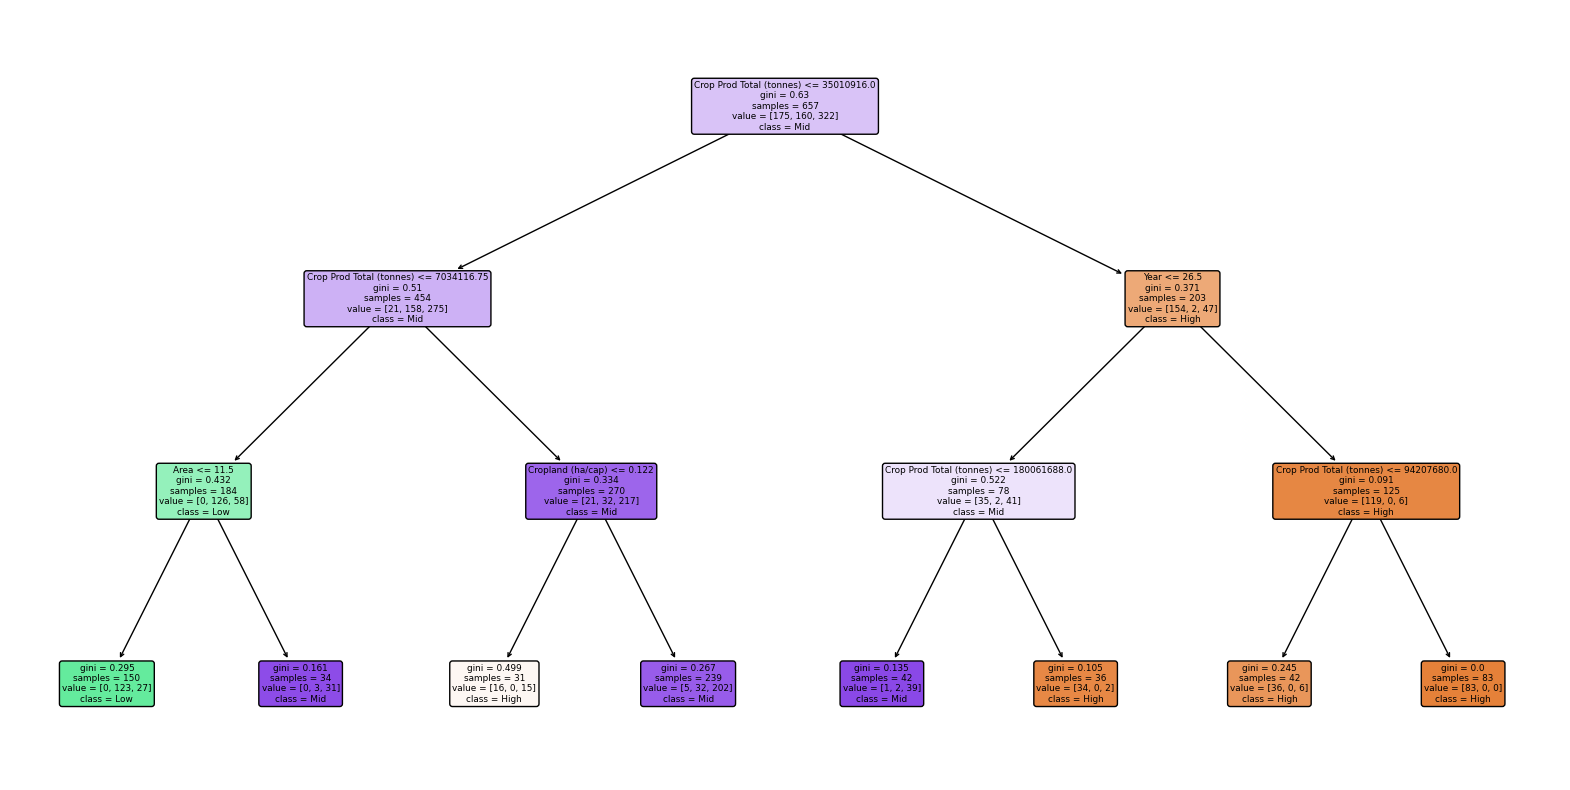

In [88]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

class_names = ["High", "Low", "Mid"]
class_names

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


The confusion matrix is:
[[31  0  0]
 [ 0 37  9]
 [ 4 11 73]]


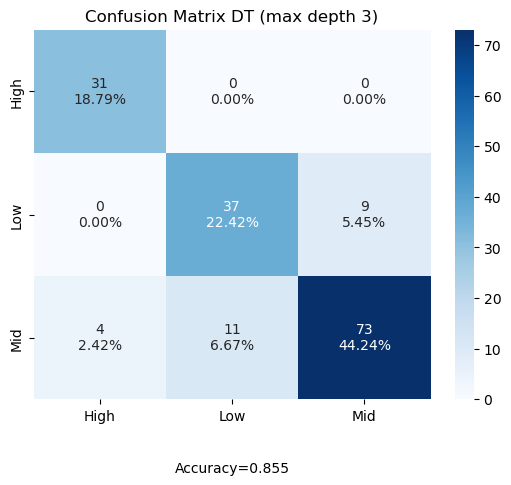

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low', 'Mid']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT (max depth 3)",
                     xyplotlabels=False)

Accuracy: 0.8848484848484849
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       0.89      0.74      0.81        46
           2       0.87      0.92      0.90        88

    accuracy                           0.88       165
   macro avg       0.89      0.89      0.89       165
weighted avg       0.89      0.88      0.88       165

Confusion Matrix:
 [[31  0  0]
 [ 0 34 12]
 [ 3  4 81]]


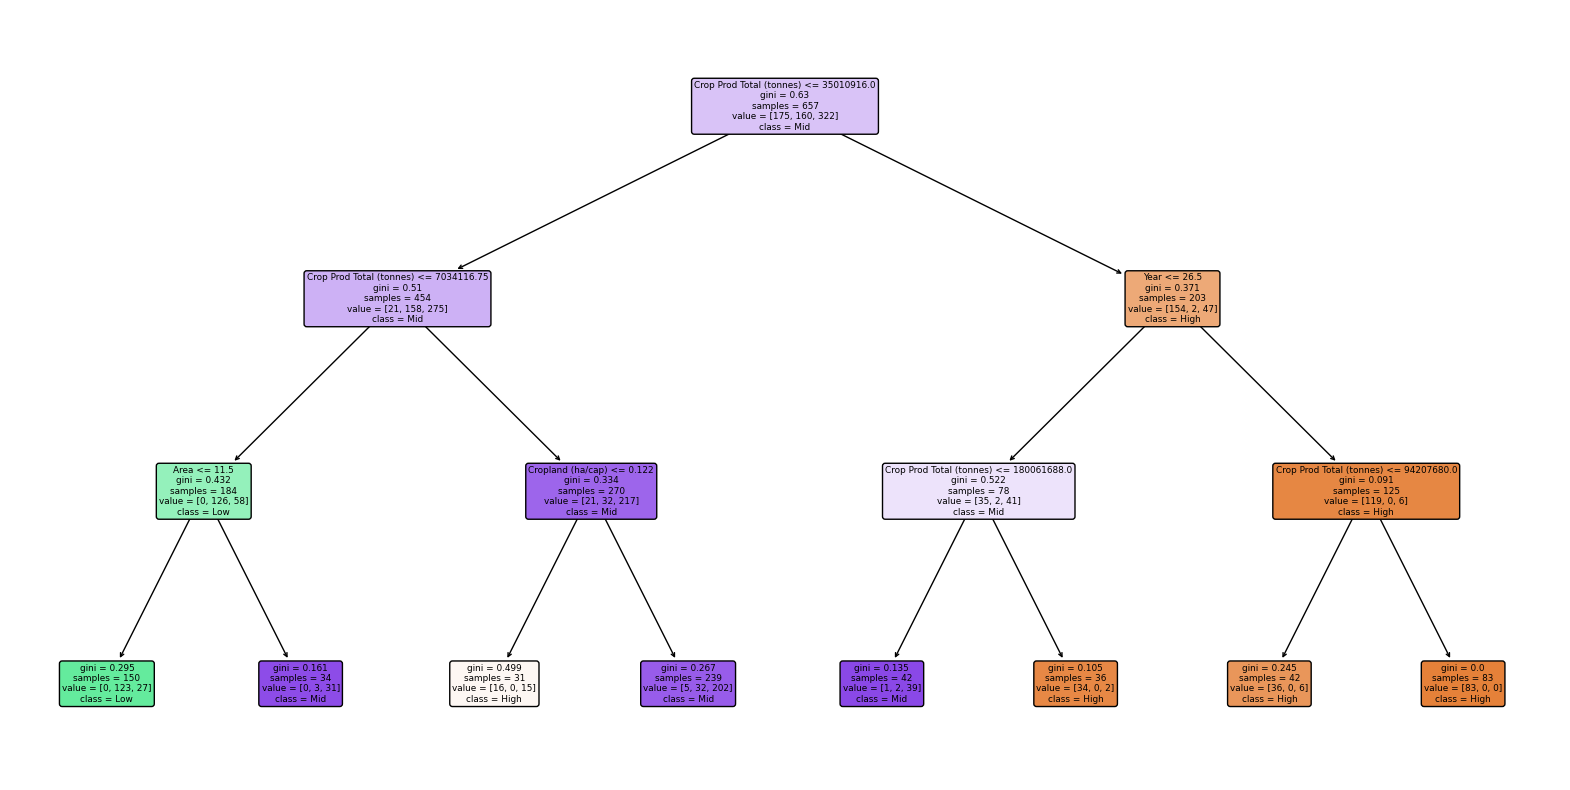

In [97]:
MyDT=DecisionTreeClassifier(criterion='gini', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=4, 
                            min_samples_split=10, 
                            min_samples_leaf=2, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.01,
                            #min_impurity_split=None, 
                            class_weight=None)

# Train the model
MyDT.fit(X_train, y_train)

y_pred = MyDT.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

class_names = ["High", "Low", "Mid"]
class_names

plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
plt.show()


The confusion matrix is:
[[31  0  0]
 [ 0 34 12]
 [ 3  4 81]]


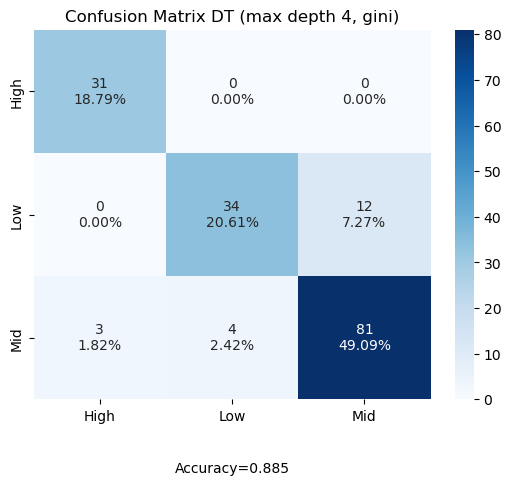

In [99]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low', 'Mid']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT (max depth 4, gini)",
                     xyplotlabels=False)

Accuracy:  0.9757575757575757


Accuracy:  0.9272727272727272


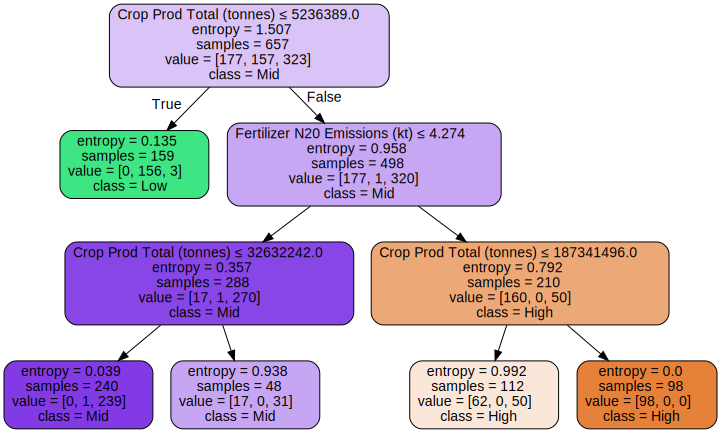

In [50]:
y_pred=MyDT.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

dot_data = tree.export_graphviz(MyDT, out_file=None,
                    ## The following creates TrainDF.columns for each
                    ## which are the feature names.
                      feature_names=X_train.columns,  
                      class_names=["High", "Low", "Mid"],  
                      filled=True, rounded=True,  
                      special_characters=True)                                    
graph = graphviz.Source(dot_data) 
graph



The confusion matrix is:
[[26  0  3]
 [ 0 48  1]
 [ 7  1 79]]


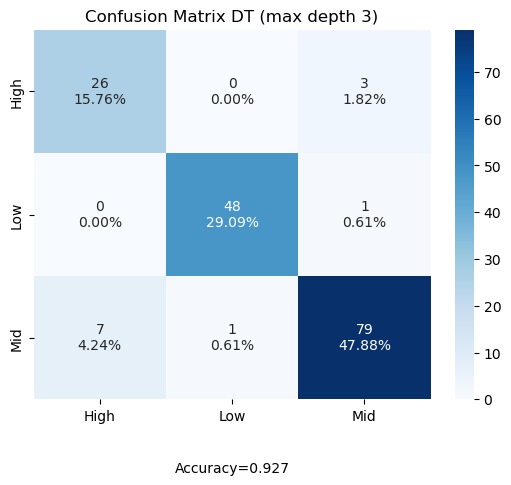

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print("\nThe confusion matrix is:")
print(cnf_matrix)

categories = ["High", 'Low', 'Mid']

make_confusion_matrix(cnf_matrix,
                      #group_names = labels,
                    categories=categories,
                     title = "Confusion Matrix DT (max depth 3)",
                     xyplotlabels=False)